In [75]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
import IPython
import copy
import math

%matplotlib notebook

## Load audio file

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  """


<IPython.core.display.Javascript object>


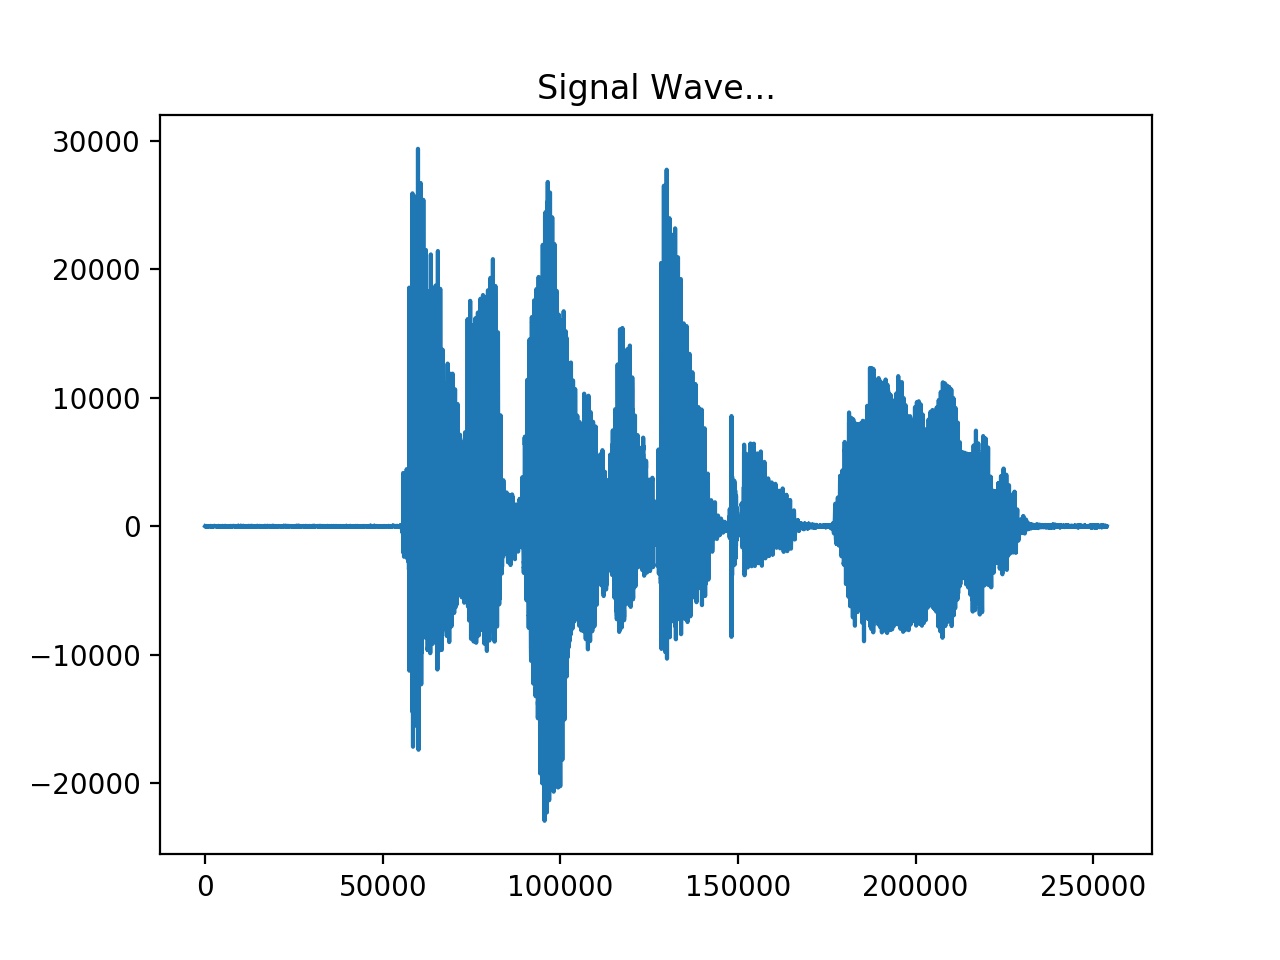

In [51]:
spf = wave.open('sample.wav','r')

#Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.fromstring(signal, 'Int16')

plt.figure(1)
plt.title('Signal Wave...')
plt.plot(signal)
plt.show()
IPython.display.Audio(signal, rate=44100)

## Add noise

<IPython.core.display.Javascript object>


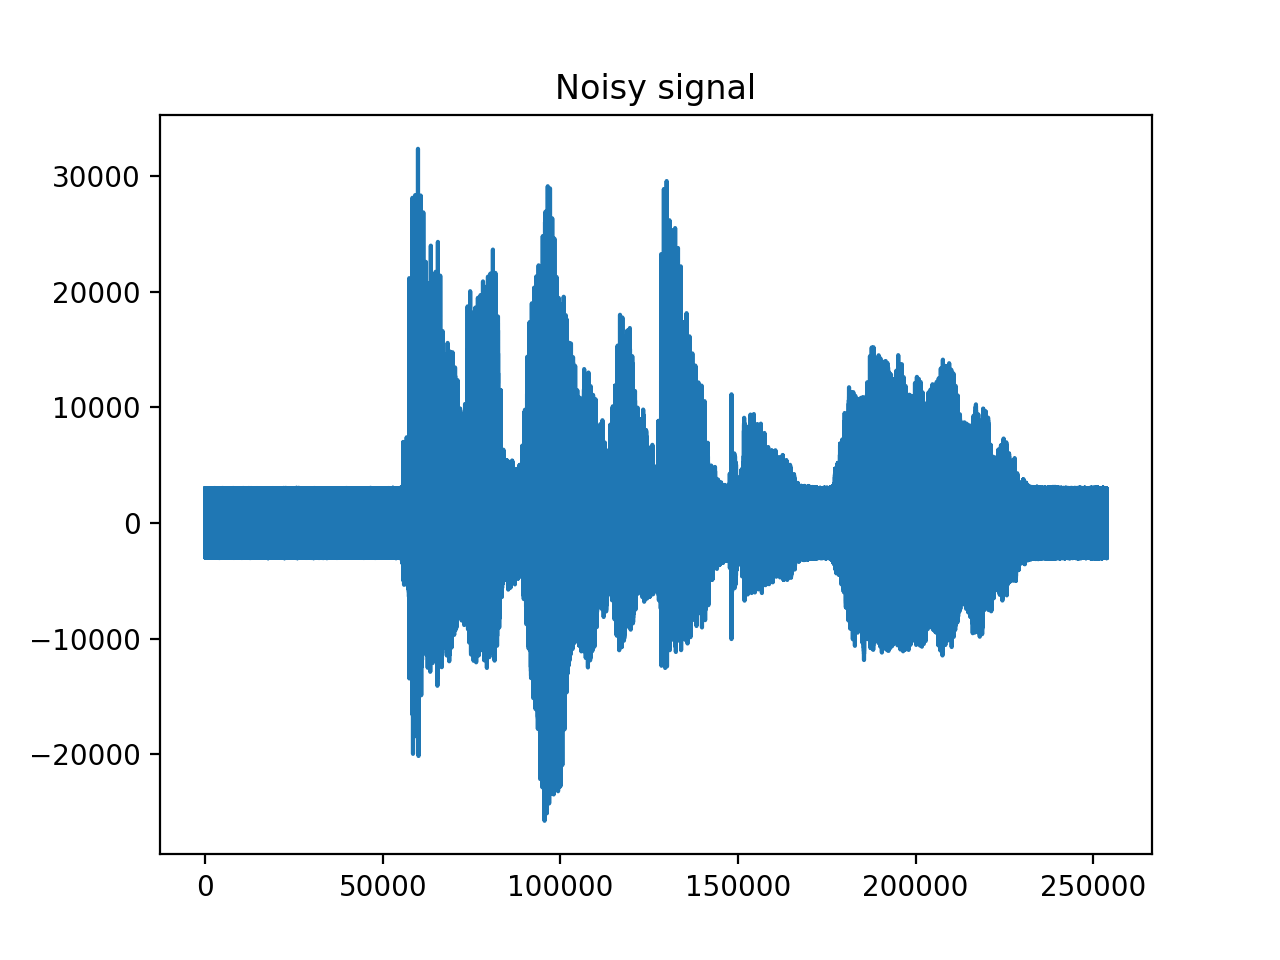

In [73]:
noise_frequency = 3000 #hz
noisy_signal = np.add(signal, 3000*np.cos(noise_frequency * len(signal) / 44100 * np.array(range(len(signal)))))
plt.figure(3)
plt.title('Noisy signal')
plt.plot(noisy_signal)
plt.show()
IPython.display.Audio(noisy_signal, rate=44100)


## DFT

<IPython.core.display.Javascript object>


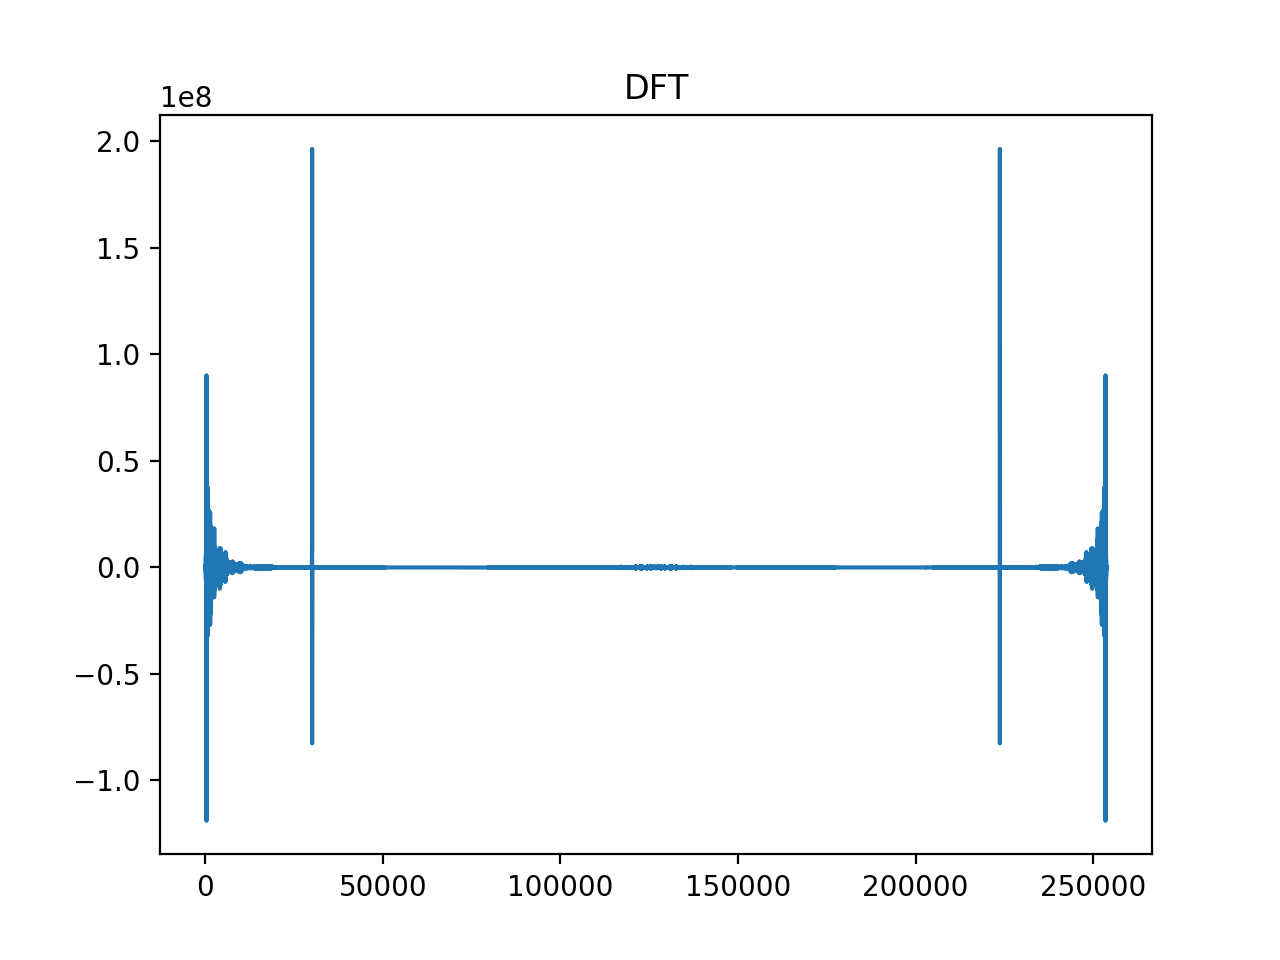

/opt/conda/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [74]:
dft = np.fft.fft(noisy_signal)
plt.figure(4)
plt.title('DFT')
plt.plot(dft)
plt.show()

## Remove High Frequency noise from DFT

<IPython.core.display.Javascript object>


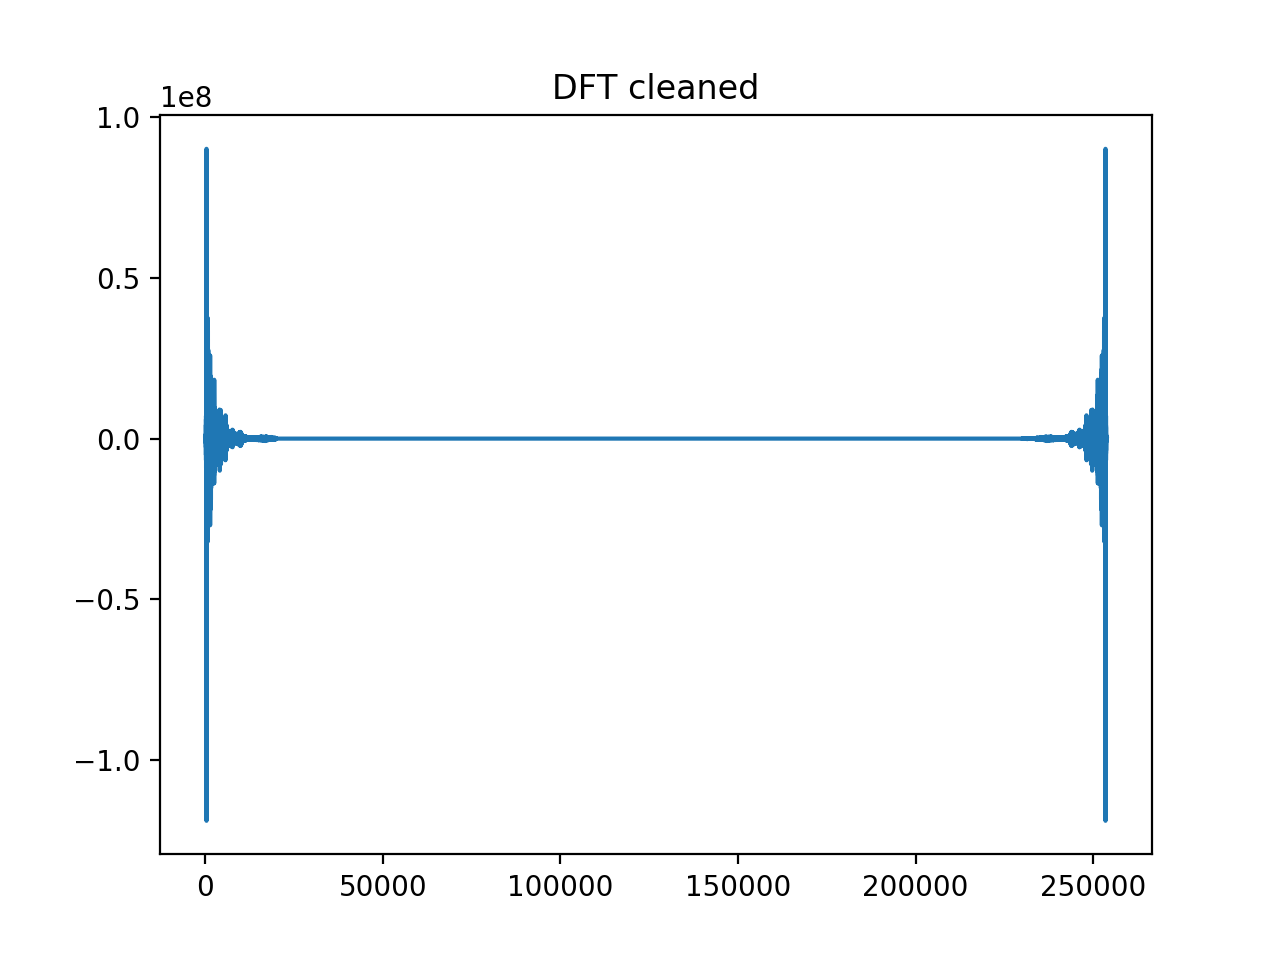

/opt/conda/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [79]:
denoised_dft = copy.copy(dft)
denoised_dft[20000:230000] = 0
plt.figure(5)
plt.title('DFT cleaned')
plt.plot(denoised_dft)
plt.show()

## Generate denoised audio signal

<IPython.core.display.Javascript object>


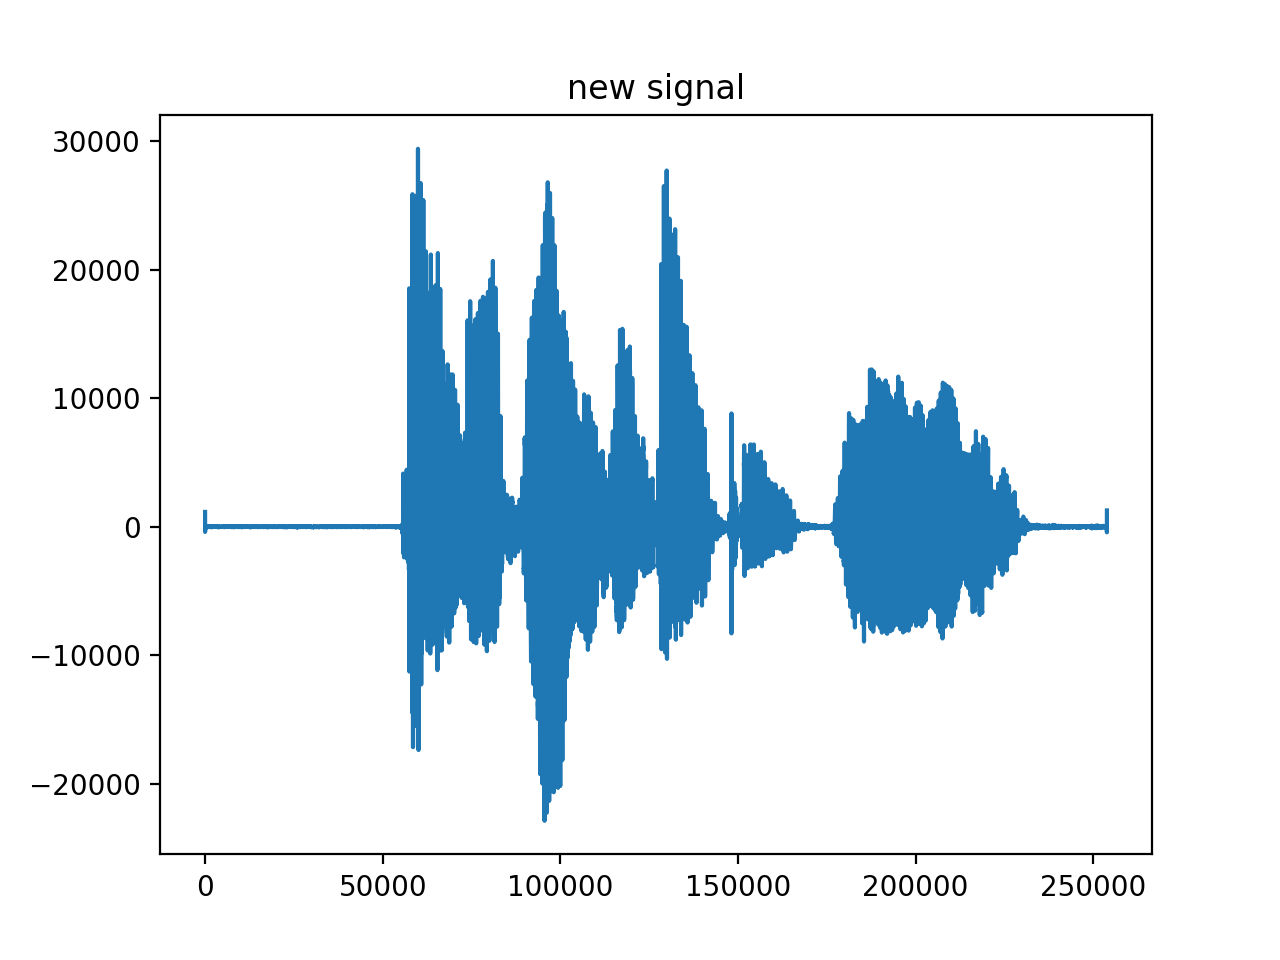

/opt/conda/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.6/site-packages/IPython/lib/display.py:123: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


In [80]:
new_signal = np.fft.ifft(denoised_dft)
plt.figure(6)
plt.title('new signal')
plt.plot(new_signal)
plt.show()
IPython.display.Audio(new_signal, rate=44100)